<a href="https://colab.research.google.com/github/urvog/wine/blob/main/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJEMPLO DE REGRESIÓN CON KNN

<img src="https://www.neuraldojo.org/media/red_wine.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" width="100%"/>

## 1.- Importación de las librerías y datos

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('winequality-red.csv', sep=';')

## 2.- Preparación de los datos

### 2.1 Inspección de los datos

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine.shape

(1599, 12)

In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
targets = wine['quality'].value_counts()
targets

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

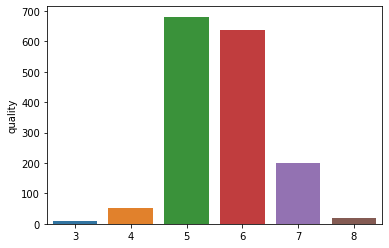

In [10]:
sns.barplot(x = targets.index, y=targets)

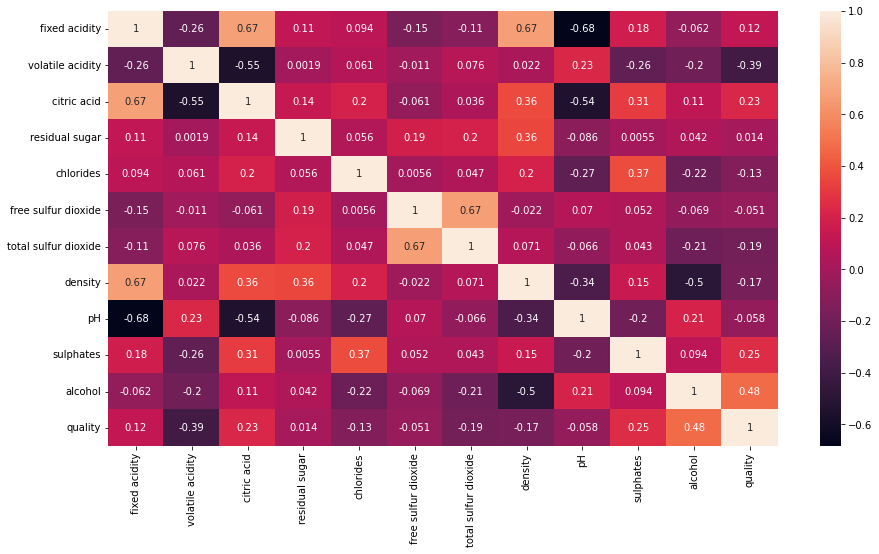

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(wine.corr(), annot=True)


### 2.2 Dividimos los datos en Entrenamiento y Test (Train Test Split)

In [98]:
#dividimos nuestro data set dos grupos preliminares de para entrenamiento y test, el dataset de test lo dejamos para el final de evaluación
test = wine.iloc[-299:,:]
wine_ = wine.iloc[0:1300,:]

In [99]:
# Para este ejemplo, vamos a usar la masa, ancho y altura para cada fruta
X = wine_.iloc[:,:-1]
y = wine_['quality']

# Utilizaremos la division por defecto 75% 25%
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

## 3. Preparamos y Entrenamos el Modelo 

In [152]:
#Entrenamos el modelo utilizando diferentes valores de n_neighbors
from sklearn.neighbors import KNeighborsClassifier
scores = []
for n_neighbors in range(1,11):
  knn = KNeighborsClassifier(n_neighbors = n_neighbors)
  knn.fit(X,y)  
  scores.append(knn.score(X_valid, y_valid))

## 4. Evaluamos el Modelo

[1.0, 0.8246153846153846, 0.7876923076923077, 0.7076923076923077, 0.6738461538461539, 0.6338461538461538, 0.6215384615384615, 0.6369230769230769, 0.6030769230769231, 0.6215384615384615]


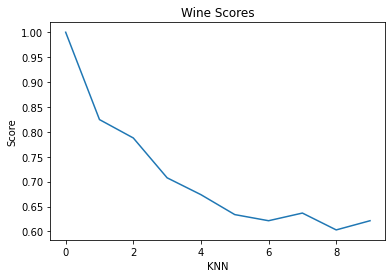

In [153]:
#Graficamos los scores obtenidos para diferntes valores de K n_neighbors
plt.plot(scores)
plt.title("Wine Scores")
plt.xlabel("KNN")
plt.ylabel("Score")
print(scores)

### 4.1 Seleccionamos el modelo con los parametros que mejor score obtuvimos

In [162]:
knn_final = KNeighborsClassifier(n_neighbors = 6)
knn_final.fit(X,y)  

KNeighborsClassifier(n_neighbors=6)

### 4.1 Evaluamos con los datos de test

In [163]:
print("Entrenamiento:",knn_final.score(X_train,y_train))
print("Evaluación:",knn_final.score(X_valid,y_valid))
print("Test:",knn_final.score(test.iloc[:,:-1],test['quality']))

Entrenamiento: 0.6482051282051282
Evaluación: 0.6338461538461538
Test: 0.47157190635451507
